In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic PCA 

Want to pick up cultural differences from the COVID data

[read this](http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf)


In [237]:
! ../.g

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Everything up-to-date


In [2]:
import requests
import pandas as pd

In [3]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

In [9]:
df = pd.read_csv('covid_deaths.csv')

In [10]:
def ref2weeks(ref):
    X = df.iloc[ref][4:].values
    X = X[len(X) % 7  + 6:]
    X = np.diff(X,1).reshape((-1,7))
    return X.sum(axis=0)



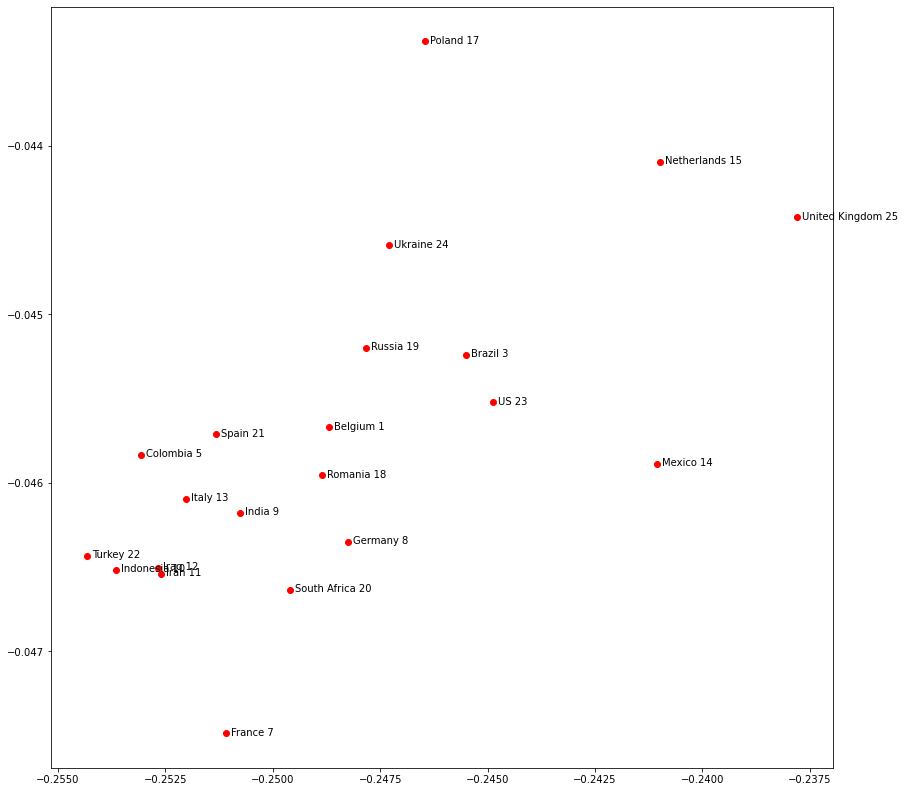

In [108]:
ref4big = df[ df.iloc[:,-1] > 8000].index.tolist()

WX = [ ref2weeks(ref) for ref in ref4big]
#normalise
WX = np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
#calculate covariance
cov = np.dot(WX, WX.T) #- np.identity(len(WX))

vp, vecs = np.linalg.eig(cov)

Xx = [ np.dot(vecs[0], u).real for u in cov]
Yx = [ .1*np.dot(vecs[1], u).real for u in cov]

fig, ax = plt.subplots()
fig.set_size_inches(14,14)
#ax.axis('off')


labels = df.iloc[ref4big,1]
kk = -1
for label , x, y  in zip(labels,Xx, Yx): 
    kk += 1
    if label.split()[0].lower() in ['ecuador', 'china', 'bolivia']: continue
    if label.lower() in ['peru', 'chile', 'argentina', 'philippines']: continue
    if label.lower() in ['sudan','oman','tunisia']: continue 
    if label[0] == 'K':continue
    
    label += ' ' + str(kk)
  
    ax.plot([x], [y], 'ro');
    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,-2), # distance from text to points (x,y) : not same units
                 ha='left') # horizontal alignment can be left, right or center
    
    

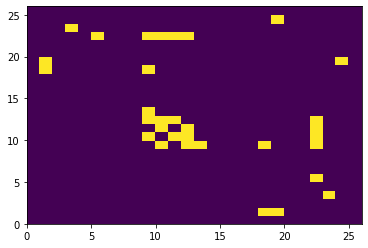

In [162]:
cc = np.zeros_like(cov)
cc[np.where(cov > .998)] = 1
cc = cc - np.identity(cov.shape[0])
plt.pcolor(cc);

In [145]:
X, Y = np.where(cov > .997)
df.iloc[ ref4big[Y[np.where(X == 22)] ],1]
Y[np.where(X == 22)]

array([ 5,  9, 10, 11, 12, 13, 22])

89      Colombia
143        India
144    Indonesia
145         Iran
146         Iraq
149        Italy
208      Romania
243       Turkey
Name: Country/Region, dtype: object

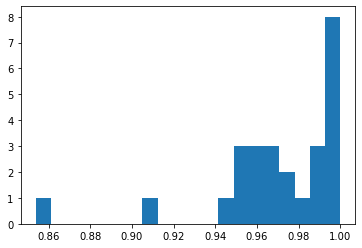

In [171]:
plt.hist(WX.sum(axis=1)/np.sqrt(7), bins = 20);

df.iloc[ref4big[WX.sum(axis=1)/np.sqrt(7) >.995],1]

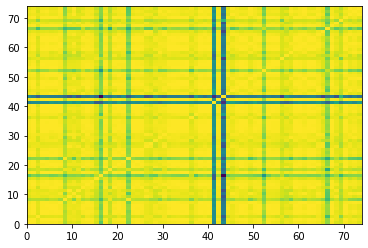

In [75]:
ref4big = df[ df.iloc[:,-1] > 1000 ].index.tolist()

WX = [ ref2weeks(ref) for ref in ref4big]
WX = np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
cov = np.dot(WX, WX.T)

plt.pcolor(cov);

(0.9973588633177395, 0.9965388795761041)

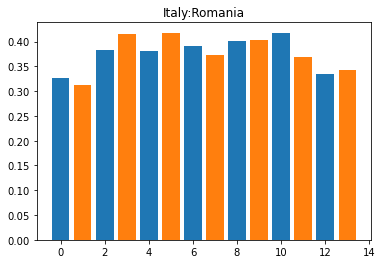

In [179]:
ref4big = np.array(ref4big)

tt = [13,18]
for k,ii in enumerate(tt):
    plt.bar(np.arange(k,7*len(tt),len(tt)), WX[ii]);
#plt.xticks()
plt.title(':'.join( df.iloc[ref4big[tt], 1]));
WX[tt[0]].dot(WX[tt[1]]), WX[tt[0]].sum()/np.sqrt(7)

0.965781791794347

In [48]:
pd.DataFrame( {'ref': np.arange(len(ref4big)), 'country':df.iloc[ref4big,1]} )

,ref,country
0,0,Afghanistan
2,1,Algeria
6,2,Argentina
7,3,Armenia
16,4,Austria
...,...,...
242,69,Tunisia
243,70,Turkey
244,71,US
246,72,Ukraine


In [236]:
! ../.g


[master 869d8df] web
 1 file changed, 519 insertions(+), 1759 deletions(-)
 rewrite PROG/covid_pca.ipynb (89%)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 10.42 KiB | 592.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   4e03317..869d8df  master -> master
